# Exercise 5: Classification Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Problem 1 : Predicting CentralAir using SalePrice

In [2]:
houseData = pd.read_csv('../data/train.csv')

#### a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship. You may also want to check the mutual relationship by plotting the two variables using a swarmplot.


In [8]:
houseData['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

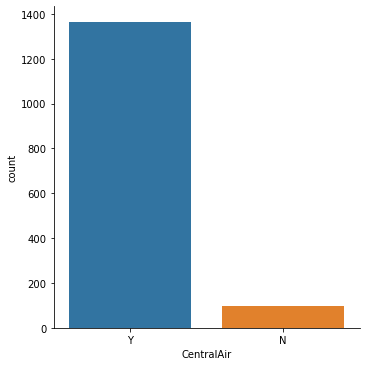

In [14]:
# Plot binary distribution
sb.catplot(x = 'CentralAir' , data = houseData , kind = 'count')

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

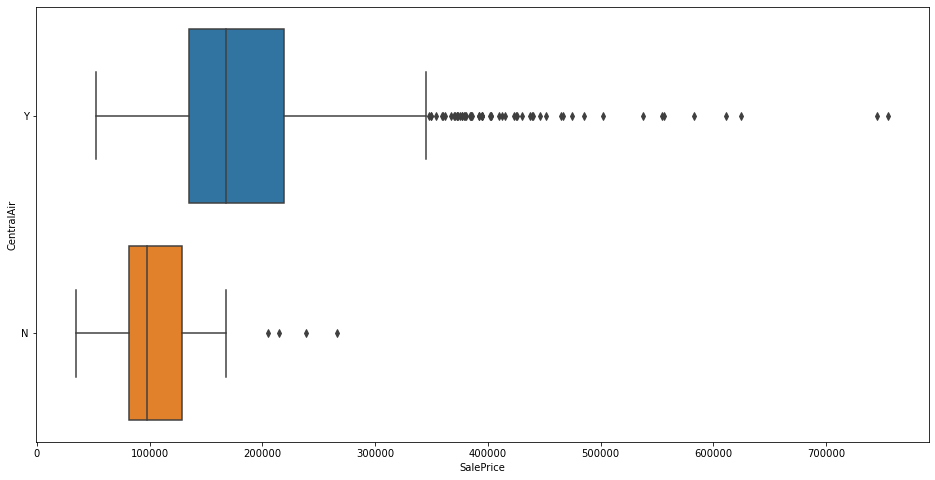

In [18]:
# relationship from boxplot 
f ,axes = plt.subplots(1,1,figsize=(16,8))
sb.boxplot(data = houseData , x = 'SalePrice' , y = 'CentralAir')

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

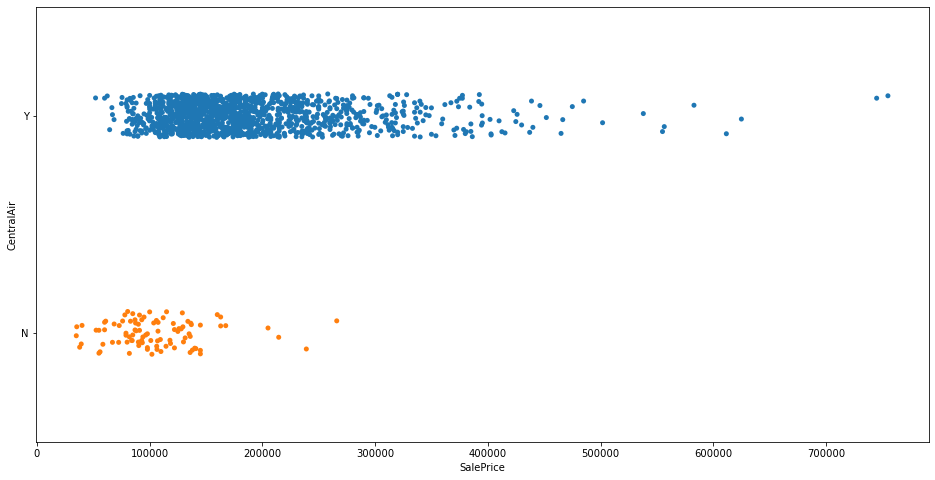

In [23]:
# swarmplot
f , axes = plt.subplots(1,1,figsize = (16,8))
sb.stripplot(x = 'SalePrice' , y = 'CentralAir' , data  = houseData)
#swarmplot didn't really fit the graph, I decided to change into sstripplot instead

#### b) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

dectree= DecisionTreeClassifier(max_depth = 2) #we can tune the depth

#### c) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).

In [29]:
from sklearn.model_selection import train_test_split 

houseData_train , houseData_test = train_test_split(houseData ,test_size=360/1460 )
# Check the sample sizes
print("Train Set :", houseData_train.shape)
print("Test Set  :", houseData_test.shape)

Train Set : (1100, 81)
Test Set  : (360, 81)


#### d) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice.

In [30]:
y_train = pd.DataFrame(houseData_train['CentralAir'])
X_train = pd.DataFrame(houseData_train['SalePrice'])

dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

#### e) Visualize the Decision Tree model using graphviz.

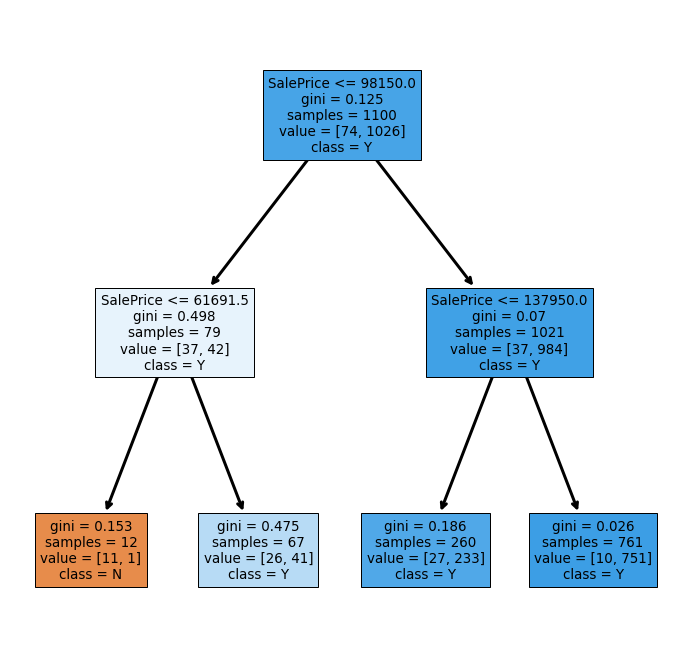

In [34]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

#### f) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix. Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.

Classification Accuracy 	: 0.9418181818181818


<AxesSubplot:>

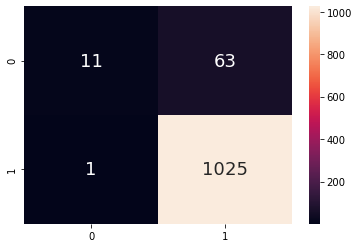

In [38]:
y_train_pred=dectree.predict(X_train)
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})

#### g) Discuss with your Friends all the accuracy parameters of the decision tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate.

Classification Accuracy 	: 0.9444444444444444


<AxesSubplot:>

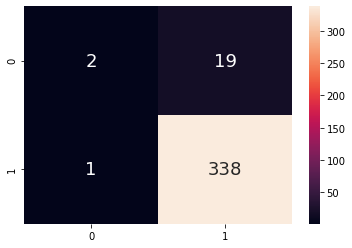

In [39]:
# Extract the two variables X_test and y_test
y_test = pd.DataFrame(houseData_test['CentralAir'])
X_test = pd.DataFrame(houseData_test['SalePrice'])

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Problem 2 : Predicting CentralAir using Other Variables

Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'
one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification
Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.